#Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

#Data

In [ ]:
#unigramas
unigrams_train = pd.read_csv('bag_of_unigrams_train.csv')
unigrams_validation = pd.read_csv('bag_of_unigrams_validation.csv')
unigrams_test = pd.read_csv('bag_of_unigrams_test.csv')
#bigramas
bigrams_train = pd.read_csv('bag_of_bigrams_train.csv')
bigrams_validation = pd.read_csv('bag_of_bigrams_validation.csv')
bigrams_test = pd.read_csv('bag_of_bigrams_test.csv')
#trigramas
trigrams_train = pd.read_csv('bag_of_trigrams_train.csv')
trigrams_validation = pd.read_csv('bag_of_trigrams_validation.csv')
trigrams_test = pd.read_csv('bag_of_trigrams_test.csv')

train_id = list(unigrams_train.id)
validation_id = list(unigrams_validation.id)
test_id = list(unigrams_test.id)

y_train = list(unigrams_train.target)
y_validation = list(unigrams_validation.target)

unigrams_train = unigrams_train.drop(['id','target'],axis = 1)
unigrams_validation = unigrams_validation.drop(['id','target'],axis = 1)
unigrams_test = unigrams_test.drop('id',axis = 1)

bigrams_train = bigrams_train.drop(['id','target'],axis = 1)
bigrams_validation = bigrams_validation.drop(['id','target'],axis = 1)
bigrams_test = bigrams_test.drop('id',axis = 1)

trigrams_train = trigrams_train.drop(['id','target'],axis = 1)
trigrams_validation = trigrams_validation.drop(['id','target'],axis = 1)
trigrams_test = trigrams_test.drop('id',axis = 1)

In [ ]:
train = pd.read_csv('set_train_features_3.csv')
validation = pd.read_csv('set_validation_features_3.csv')
test = pd.read_csv('set_test_features_3.csv')

In [ ]:
train = train.drop(['target','id'],axis = 1)
validation = validation.drop(['target','id'],axis = 1)
test = test.drop(['id'],axis = 1)

In [ ]:
train = pd.concat([train,unigrams_train,bigrams_train,trigrams_train],axis = 1)
validation = pd.concat([validation,unigrams_validation,bigrams_validation,trigrams_validation],axis = 1)
test = pd.concat([test,unigrams_test,bigrams_test,trigrams_test],axis = 1)

In [ ]:
print(train.shape)
print(validation.shape)
print(test.shape)

(6090, 2421)
(1523, 2421)
(3263, 2421)


#Parameters Tuning

###Criterion: "gini"

In [ ]:
y = []
estimators = range(100,1001,15)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'gini')
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')

Estimators Tuning...

Training Random Forest: Estimators ->  100 ... Score:  0.7734734077478661 

Training Random Forest: Estimators ->  115 ... Score:  0.7747866053841103 

Training Random Forest: Estimators ->  130 ... Score:  0.7728168089297439 

Training Random Forest: Estimators ->  145 ... Score:  0.7708470124753776 

Training Random Forest: Estimators ->  160 ... Score:  0.7741300065659882 

Training Random Forest: Estimators ->  175 ... Score:  0.7767564018384767 

Training Random Forest: Estimators ->  190 ... Score:  0.7741300065659882 

Training Random Forest: Estimators ->  205 ... Score:  0.7721602101116218 

Training Random Forest: Estimators ->  220 ... Score:  0.7715036112934996 

Training Random Forest: Estimators ->  235 ... Score:  0.7754432042022325 

Training Random Forest: Estimators ->  250 ... Score:  0.7728168089297439 

Training Random Forest: Estimators ->  265 ... Score:  0.7747866053841103 

Training Random Forest: Estimators ->  280 ... Score:  0.774786605

##Visualization

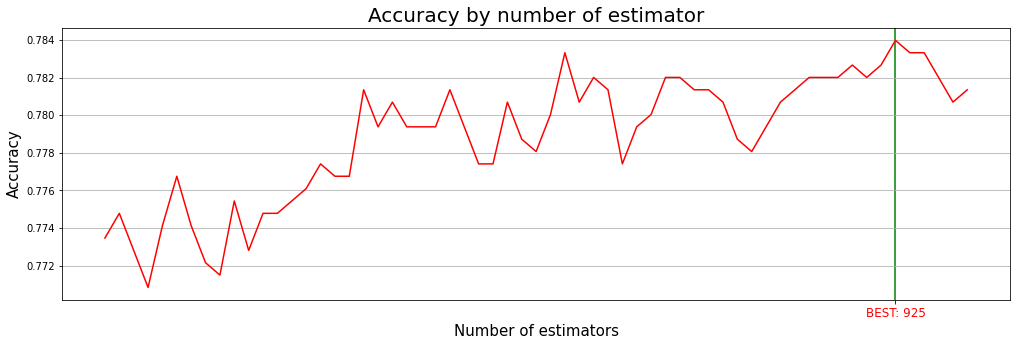

In [ ]:
x = estimators
n_estimator = estimators[y.index(max(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Accuracy by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

##Criterion: entropy

In [ ]:
y = []
estimators = range(100,1001,15)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'entropy')
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')

Estimators Tuning...

Training Random Forest: Estimators ->  100 ... Score:  0.7747866053841103 

Training Random Forest: Estimators ->  115 ... Score:  0.7767564018384767 

Training Random Forest: Estimators ->  130 ... Score:  0.7721602101116218 

Training Random Forest: Estimators ->  145 ... Score:  0.7741300065659882 

Training Random Forest: Estimators ->  160 ... Score:  0.7728168089297439 

Training Random Forest: Estimators ->  175 ... Score:  0.7800393959290873 

Training Random Forest: Estimators ->  190 ... Score:  0.7793827971109653 

Training Random Forest: Estimators ->  205 ... Score:  0.7800393959290873 

Training Random Forest: Estimators ->  220 ... Score:  0.7754432042022325 

Training Random Forest: Estimators ->  235 ... Score:  0.7728168089297439 

Training Random Forest: Estimators ->  250 ... Score:  0.7774130006565988 

Training Random Forest: Estimators ->  265 ... Score:  0.7747866053841103 

Training Random Forest: Estimators ->  280 ... Score:  0.776756401

##Visualization

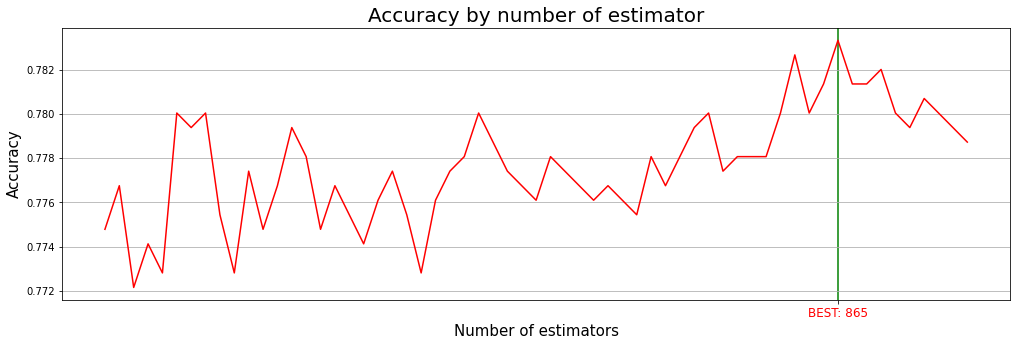

In [ ]:
x = estimators
n_estimator = estimators[y.index(max(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Accuracy by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

In [ ]:
y = []
estimators = range(920,935)

print('Estimators Tuning...\n')

for n in estimators:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n, criterion = 'gini')
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Estimators -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best n_estimator is ',estimators[y.index(max(y))],' with ',max(y),' accuracy')

Estimators Tuning...

Training Random Forest: Estimators ->  920 ... Score:  0.783322390019698 

Training Random Forest: Estimators ->  921 ... Score:  0.783322390019698 

Training Random Forest: Estimators ->  922 ... Score:  0.783322390019698 

Training Random Forest: Estimators ->  923 ... Score:  0.7839789888378201 

Training Random Forest: Estimators ->  924 ... Score:  0.7839789888378201 

Training Random Forest: Estimators ->  925 ... Score:  0.7839789888378201 

Training Random Forest: Estimators ->  926 ... Score:  0.7839789888378201 

Training Random Forest: Estimators ->  927 ... Score:  0.7839789888378201 

Training Random Forest: Estimators ->  928 ... Score:  0.783322390019698 

Training Random Forest: Estimators ->  929 ... Score:  0.783322390019698 

Training Random Forest: Estimators ->  930 ... Score:  0.783322390019698 

Training Random Forest: Estimators ->  931 ... Score:  0.783322390019698 

Training Random Forest: Estimators ->  932 ... Score:  0.7839789888378201

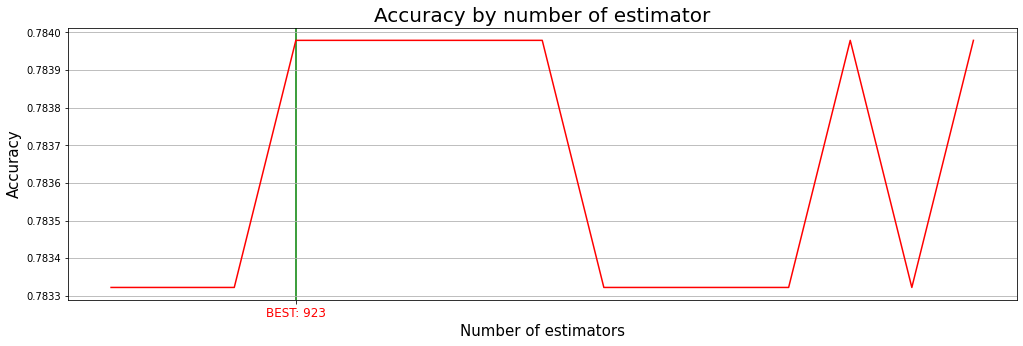

In [ ]:
x = estimators
n_estimator = estimators[y.index(max(y))]
tick = 'BEST' + ': ' + str(n_estimator)
plt.figure(figsize=(17,5))
plt.title('Accuracy by number of estimator',fontsize = 20)
plt.xlabel('Number of estimators', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([n_estimator],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'red',grid_color = 'green', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'red')
plt.show()

##Max depth

In [ ]:
depths = range(5,41)
y.clear()

#Tomo la cantidad de estimadores que maximizo el anterior cross validation
n_estimator = n_estimator

#Tomo como criterio 'gini'

print('Depth Tuning...\n')

for n in depths:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n_estimator, criterion = 'gini', max_depth = n)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Max depth -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best depth is ',depths[y.index(max(y))],' with ',max(y),' accuracy')

Depth Tuning...

Training Random Forest: Max depth ->  5 ... Score:  0.7537754432042022 

Training Random Forest: Max depth ->  6 ... Score:  0.757715036112935 

Training Random Forest: Max depth ->  7 ... Score:  0.762967826657912 

Training Random Forest: Max depth ->  8 ... Score:  0.7688772160210111 

Training Random Forest: Max depth ->  9 ... Score:  0.7695338148391333 

Training Random Forest: Max depth ->  10 ... Score:  0.7695338148391333 

Training Random Forest: Max depth ->  11 ... Score:  0.7741300065659882 

Training Random Forest: Max depth ->  12 ... Score:  0.7721602101116218 

Training Random Forest: Max depth ->  13 ... Score:  0.7728168089297439 

Training Random Forest: Max depth ->  14 ... Score:  0.7800393959290873 

Training Random Forest: Max depth ->  15 ... Score:  0.7754432042022325 

Training Random Forest: Max depth ->  16 ... Score:  0.7760998030203545 

Training Random Forest: Max depth ->  17 ... Score:  0.778069599474721 

Training Random Forest: Max d

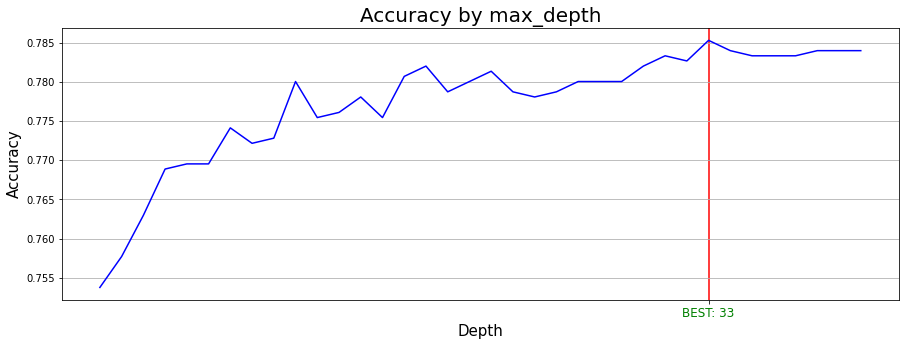

In [ ]:
x = depths
depth = depths[y.index(max(y))]
tick = 'BEST' + ': ' + str(depth)
plt.figure(figsize=(15,5))
plt.title('Accuracy by max_depth',fontsize = 20)
plt.xlabel('Depth', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([depth],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'blue')
plt.show()

##Min_samples_split

In [ ]:
y.clear()
samples_split = [2,3,4,5,6,7,8,9,10,11,12]

print('Sample split Tuning...\n')

for n in samples_split:
  model_tuned = RandomForestClassifier(random_state = 0, n_estimators = n_estimator, criterion = 'gini', max_depth = depth, min_samples_split = n)
  model_tuned.fit(train, y_train)
  score = model_tuned.score(validation,y_validation)
  print('Training Random Forest: Sample split -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best sample split is ',samples_split[y.index(max(y))],' with ',max(y),' accuracy')

Sample split Tuning...

Training Random Forest: Sample split ->  2 ... Score:  0.7852921864740644 

Training Random Forest: Sample split ->  3 ... Score:  0.7767564018384767 

Training Random Forest: Sample split ->  4 ... Score:  0.7787261982928431 

Training Random Forest: Sample split ->  5 ... Score:  0.7800393959290873 

Training Random Forest: Sample split ->  6 ... Score:  0.7806959947472094 

Training Random Forest: Sample split ->  7 ... Score:  0.7806959947472094 

Training Random Forest: Sample split ->  8 ... Score:  0.7800393959290873 

Training Random Forest: Sample split ->  9 ... Score:  0.7787261982928431 

Training Random Forest: Sample split ->  10 ... Score:  0.7767564018384767 

Training Random Forest: Sample split ->  11 ... Score:  0.7734734077478661 

Training Random Forest: Sample split ->  12 ... Score:  0.7793827971109653 

DONE!

The best sample split is  2  with  0.7852921864740644  accuracy


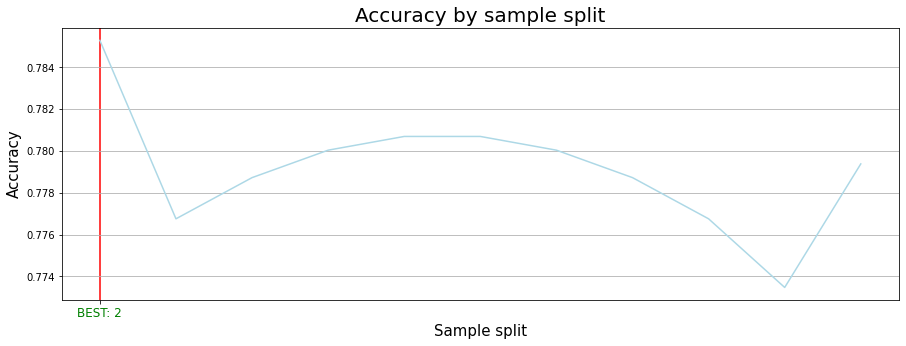

In [ ]:
x = samples_split
sample_split = samples_split[y.index(max(y))]
tick = 'BEST' + ': ' + str(sample_split)
plt.figure(figsize=(15,5))
plt.title('Accuracy by sample split',fontsize = 20)
plt.xlabel('Sample split', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([sample_split],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'lightblue')
plt.show()

##Max Features

In [ ]:
y.clear()
features = range(2,50)

print('Max features Tuning...\n')

for n in features:
  model = RandomForestClassifier(random_state = 0, n_estimators = n_estimator, criterion = 'gini', max_depth = depth, min_samples_split = sample_split,\
                                 max_features = n)
  model.fit(train, y_train)
  score = model.score(validation,y_validation)
  print('Training Random Forest:  Max features -> ',n,'... Score: ',score,'\n')
  y.append(score)
print('DONE!\n')
print('The best max number of features is ',features[y.index(max(y))],' with ',max(y),' accuracy')

Max features Tuning...

Training Random Forest:  Max features ->  2 ... Score:  0.768220617202889 

Training Random Forest:  Max features ->  3 ... Score:  0.7721602101116218 

Training Random Forest:  Max features ->  4 ... Score:  0.7734734077478661 

Training Random Forest:  Max features ->  5 ... Score:  0.7701904136572554 

Training Random Forest:  Max features ->  6 ... Score:  0.7747866053841103 

Training Random Forest:  Max features ->  7 ... Score:  0.7655942219304005 

Training Random Forest:  Max features ->  8 ... Score:  0.7669074195666448 

Training Random Forest:  Max features ->  9 ... Score:  0.7734734077478661 

Training Random Forest:  Max features ->  10 ... Score:  0.7774130006565988 

Training Random Forest:  Max features ->  11 ... Score:  0.7715036112934996 

Training Random Forest:  Max features ->  12 ... Score:  0.7734734077478661 

Training Random Forest:  Max features ->  13 ... Score:  0.7747866053841103 

Training Random Forest:  Max features ->  14 ... 

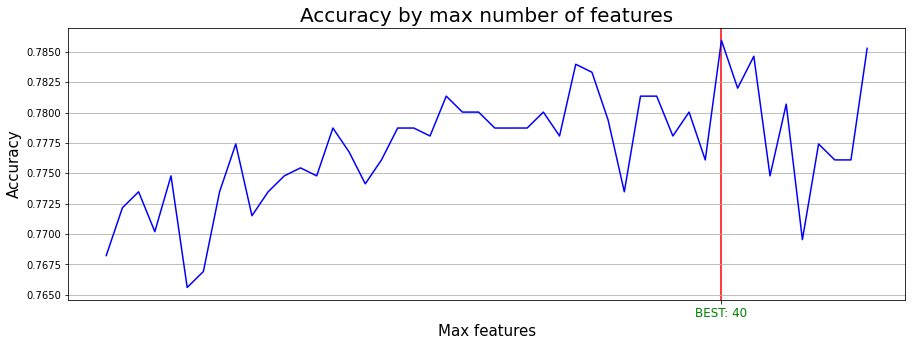

In [ ]:
x = features
max_features = features[y.index(max(y))]
tick = 'BEST' + ': ' + str(max_features)
plt.figure(figsize=(15,5))
plt.title('Accuracy by max number of features',fontsize = 20)
plt.xlabel('Max features', fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks([max_features],[tick])
plt.tick_params(labelsize = 'large', labelcolor = 'green',grid_color = 'red', axis = 'x', grid_linewidth = 1.5)
plt.grid()
plt.plot(x, y,color = 'blue')
plt.show()

#Model

In [ ]:
model = RandomForestClassifier(random_state = 0, n_estimators = 923, criterion = 'gini', max_depth = 33, min_samples_split = 2,\
                                 max_features = 40)
model.fit(train, y_train)
print(model.score(train,y_train))
print(model.score(validation,y_validation))

0.9944170771756978
0.7859487852921865


#Predictions

In [ ]:
prediction_val = model.predict(validation)
prediction_test = model.predict(test)

In [ ]:
(pd.DataFrame({'id':validation_id,'target':prediction_val})).to_csv('VAL_prediction_model3.csv', header = True, index = False)
(pd.DataFrame({'id':test_id,'target':prediction_test})).to_csv('TEST_prediction_model3.csv', header = True, index = False)